In [1]:
import pickle as pkl
import numpy as np
import pk_plot_library as pplib
from figrid.data_sort import DataSort

pplib.imports()

In [2]:
ds = DataSort()
ds.loadHdf5('/Users/cosinga/code/hcolor/fig_md_analysis/color-mass.hdf5')

ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center', va = 'top')
ds.axisLabelArgs('both', fontsize = 16)

ds.setOrder('dust', ['no_dust', 'dust'])
ds.displayAs('dust', ['no_dust', 'dust'], ['No Dust', 'With Dust'])

ds.displayAs('censat', ['all', 'satellites', 'centrals'], ['All Galaxies', 'Satellites', 'Centrals'])
ds.setOrder('censat', ['all', 'centrals', 'satellites'])

snapshots = ds.getAttrVals('snapshot')
snapshots.reverse()
ds.setOrder('snapshot', snapshots)
ds.displayAs('snapshot', snapshots, ['z = 0.0', 'z = 0.5', 'z = 1.0', 'z = 2.0'])
ds.setCmap('snapshot', 'viridis', snapshots)

In [25]:
import matplotlib as mpl
import copy
def plot_im(ax, data, kwargs):
    x = data[0, :]
    y = data[1, :]
    data = data[2:, :]
    kwargs['aspect'] = 'auto'
    kwargs['origin'] = 'lower'
    kwargs['extent'] = (x[0], x[-1], y[0], y[-1])    
    norm = mpl.colors.LogNorm(vmin = 1, vmax = 500)
    cmap = copy.copy(mpl.cm.get_cmap('viridis'))
    cmap.set_under('k')
    kwargs['norm'] = norm
    kwargs['cmap'] = cmap
    ax.imshow(np.flipud(np.rot90(data)), **kwargs)

    xlim = ax.get_xlim()
    ax.plot(xlim, [0.6, 0.6], color = 'red', linestyle = 'dashed')
    ax.plot(xlim, [0.5, 0.5], color = 'red', linestyle = 'dotted')
    ax.plot(xlim, [0.45, 0.45], color = 'pink', linestyle = 'dashed')
    ax.plot(xlim, [0.3, 0.3], color = 'pink', linestyle = 'dotted')
    return

def plot_no_line(ax, data, kwargs):
    x = data[0, :]
    y = data[1, :]
    data = data[2:, :]
    kwargs['aspect'] = 'auto'
    kwargs['origin'] = 'lower'
    kwargs['extent'] = (x[0], x[-1], y[0], y[-1])    
    norm = mpl.colors.LogNorm(vmin = 1, vmax = 500)
    cmap = copy.copy(mpl.cm.get_cmap('viridis'))
    cmap.set_under('w')
    kwargs['norm'] = norm
    kwargs['cmap'] = cmap
    ax.imshow(np.flipud(np.rot90(data)), **kwargs)

    return

def plot_hist(ax, data, kwargs):
    x = data[0, :]
    y = data[1, :]
    data = data[2:, :]
    gr = np.sum(data, axis = 0)
    mask_zero = gr >= 1
    ax.plot(y[mask_zero], gr[mask_zero], **kwargs)
    ax.plot([0.6, 0.6], ax.get_ylim())
    ax.plot([0.55, 0.55], ax.get_ylim())
    ax.plot([0.5, 0.5], ax.get_ylim())
#     ylim = ax.get_ylim()
#     ax.plot([0.6, 0.6], ylim, color = 'red', linestyle = 'dashed')
#     ax.plot([0.5, 0.5], ylim, color = 'red', linestyle = 'dotted')
#     ax.plot([0.45, 0.45], ylim, color = 'pink', linestyle = 'dashed')
#     ax.plot([0.35, 0.35], ylim, color = 'pink', linestyle = 'dotted')
    return
    
def plot_ub(ax, data, kwargs):
    x = data[0, :]
    y = data[1, :]*-1
    data = data[2:, :]
    gr = np.sum(data, axis = 0)
    mask_zero = gr >= 1
    ax.plot(y[mask_zero], gr[mask_zero], **kwargs)

#     ylim = ax.get_ylim()
#     ax.plot([0.6, 0.6], ylim, color = 'red', linestyle = 'dashed')
#     ax.plot([0.5, 0.5], ylim, color = 'red', linestyle = 'dotted')
#     ax.plot([0.45, 0.45], ylim, color = 'pink', linestyle = 'dashed')
#     ax.plot([0.35, 0.35], ylim, color = 'pink', linestyle = 'dotted')
    return

The row values for dust: ['no_dust', 'dust']
The column values for snapshot: [99, 67, 50, 33]


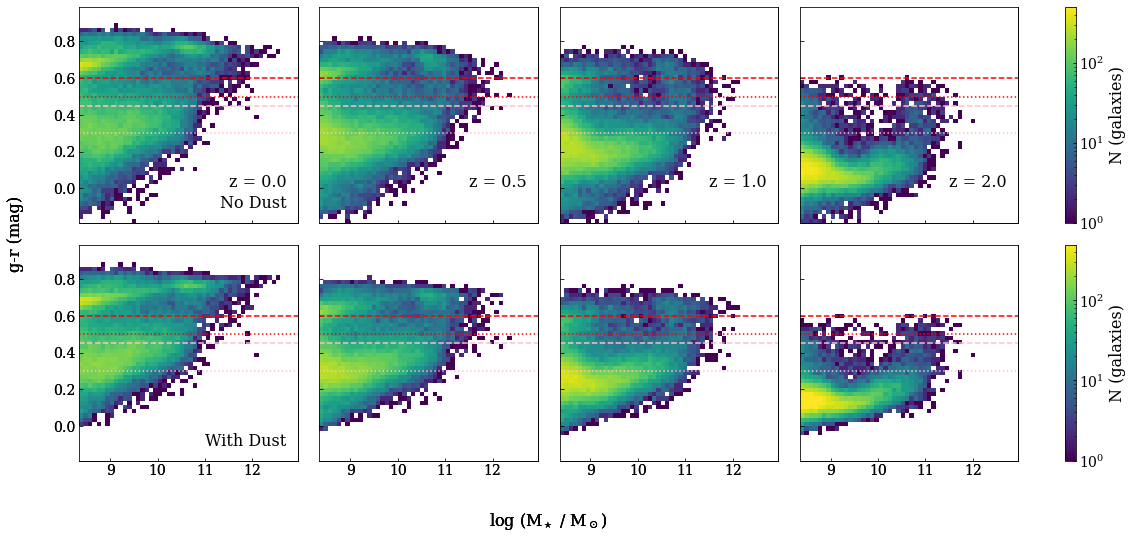

In [26]:
fg = ds.figrid('', 'dust', 'snapshot', in_attrs = {'censat':'all', 'band':'gr'})
fg.setFunc({}, plot_im)
fg.legendArgs(rm_legend = True)
fg.rowLabels(pos = [0.95, 0.05])
fg.rowLabelArgs(va = 'bottom', ha = 'right')
fg.colLabels(pos = [0.95, 0.15])
fg.colLabelArgs(va = 'bottom', ha = 'right')
fg.setYLabel('g-r (mag)')
fg.setXLabel('log (M$_\\star$ / M$_\\odot$)')
fg.gspecArgs(wspace = 0.1, hspace = 0.1)
fg.setDefaultTicksParams()
fg.addCbar('row', norm = 'log', label = 'N (galaxies)', aspect = 7.5, anchor = [0, 1])
fg.plot()

The row values for dust: ['no_dust', 'dust']
The column values for snapshot: [99, 67, 50, 33]


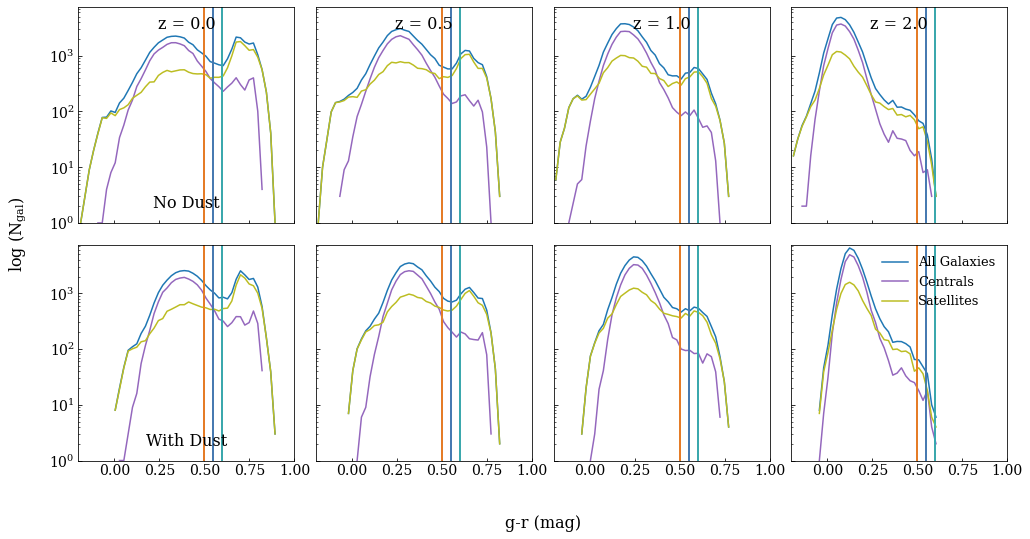

In [27]:
fg = ds.figrid('censat', 'dust', 'snapshot', {'band':'gr'})
fg.setFunc({}, plot_hist)

fg.setXLabel('g-r (mag)')
fg.setYLabel('log (N$_{\\mathrm{gal}}$)')
fg.legendArgs(fontsize = 13)
fg.gspecArgs(wspace = 0.1, hspace = 0.1)
fg.rowLabels(pos = (0.5, 0.05))
fg.rowLabelArgs(ha = 'center')
fg.colLabels(pos = (0.5, 0.96))
fg.setDefaultTicksParams()
fg.axisArgs(xlim = (-0.2, 1.0), ylim = (1, 7500), yscale = 'log')
fg.plot()

The row values for dust: ['no_dust', 'dust']
The column values for snapshot: [99, 67, 50, 33]


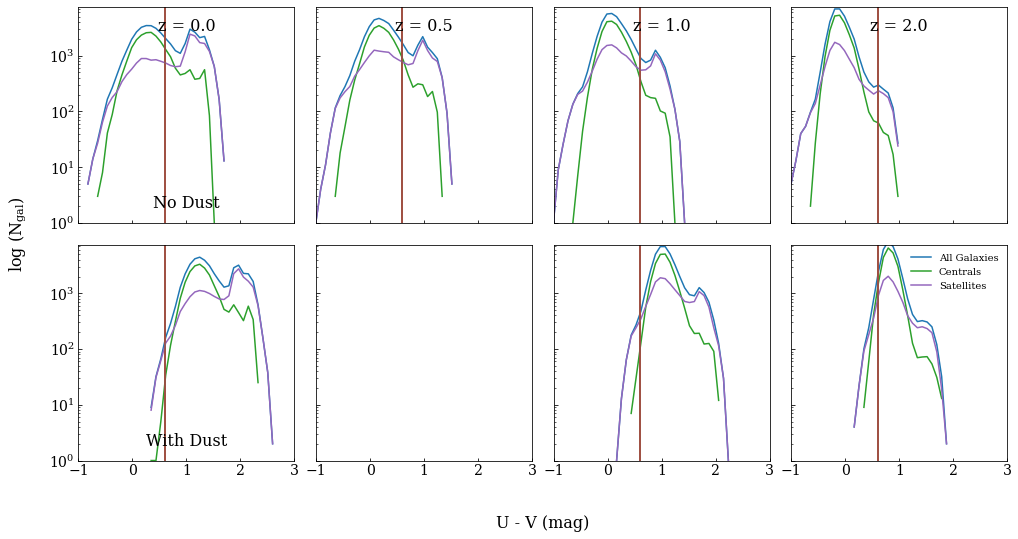

In [18]:
fg = ds.figrid('censat', 'dust', 'snapshot', in_attrs = {'band':'uv'})
fg.setFunc({}, plot_hist)

fg.setXLabel('U - V (mag)')
fg.setYLabel('log (N$_{\\mathrm{gal}}$)')
fg.legendArgs(fontsize = 10)
fg.gspecArgs(wspace = 0.1, hspace = 0.1)
fg.rowLabels(pos = (0.5, 0.05))
fg.rowLabelArgs(ha = 'center')
# fg.colLabels(pos = (0.5, 0.1))
fg.setDefaultTicksParams()
fg.axisArgs(xlim = (-1, 3), ylim = (1, 7500), yscale = 'log')
fg.plot()

The row values for dust: ['no_dust', 'dust']
The column values for snapshot: [99, 67, 50, 33]


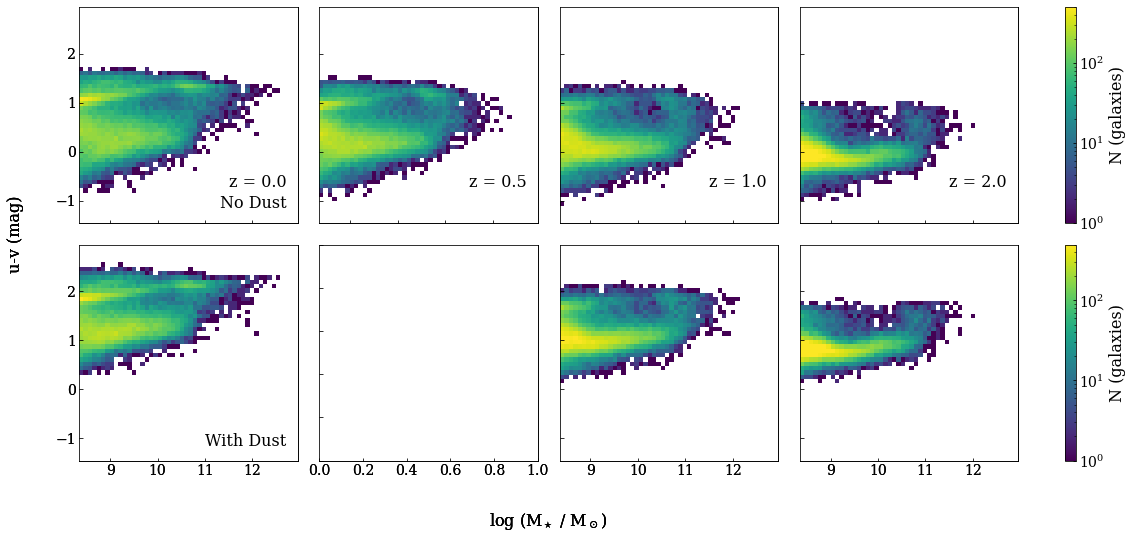

In [9]:
fg = ds.figrid('', 'dust', 'snapshot', in_attrs = {'censat':'all', 'band':'uv'})
fg.setFunc({}, plot_no_line)
fg.legendArgs(rm_legend = True)
fg.rowLabels(pos = [0.95, 0.05])
fg.rowLabelArgs(va = 'bottom', ha = 'right')
fg.colLabels(pos = [0.95, 0.15])
fg.colLabelArgs(va = 'bottom', ha = 'right')
fg.setYLabel('u-v (mag)')
fg.setXLabel('log (M$_\\star$ / M$_\\odot$)')
fg.gspecArgs(wspace = 0.1, hspace = 0.1)
fg.setDefaultTicksParams()
fg.addCbar('row', norm = 'log', label = 'N (galaxies)', aspect = 7.5, anchor = [0, 1])
fg.plot()

# Make Paper Figures

The row values for censat: ['all', 'centrals', 'satellites']
The column values for snapshot: [99, 67, 50, 33]


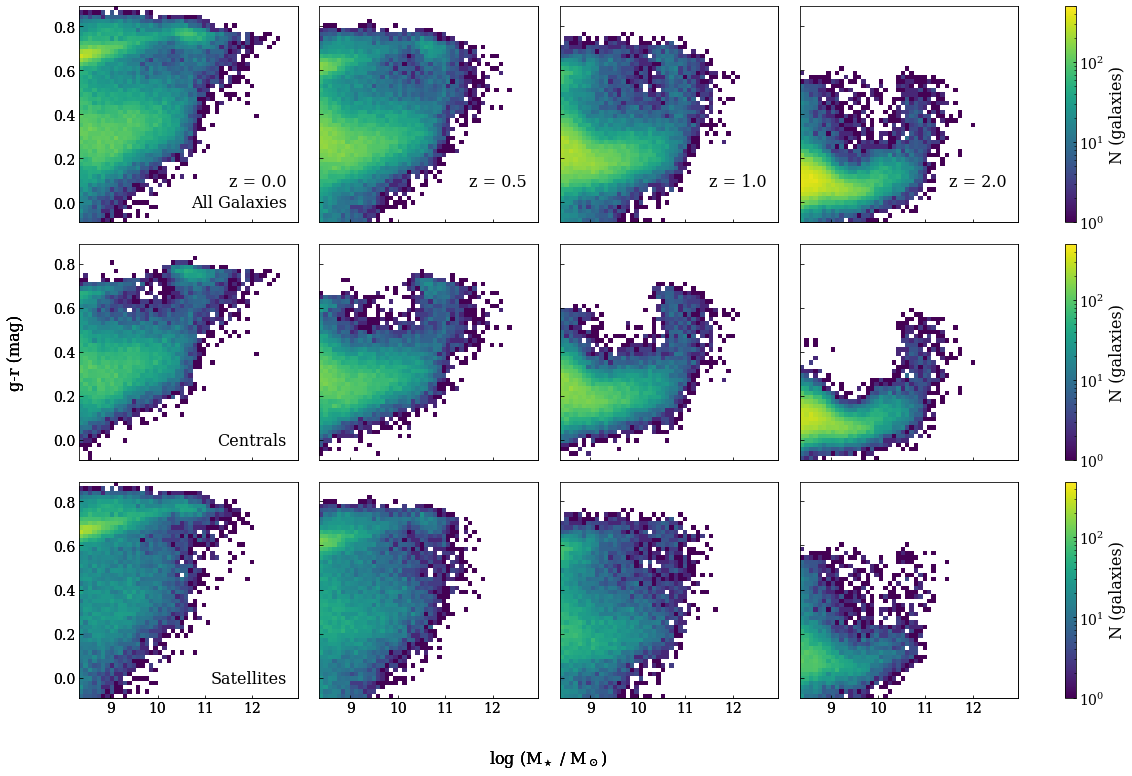

In [6]:
fg = ds.figrid('', 'censat', 'snapshot', in_attrs = {'dust':'no_dust'})
fg.setFunc({}, plot_no_line)
fg.legendArgs(rm_legend = True)
fg.rowLabels(pos = [0.95, 0.05])
fg.rowLabelArgs(va = 'bottom', ha = 'right')
fg.colLabels(pos = [0.95, 0.15])
fg.colLabelArgs(va = 'bottom', ha = 'right')
fg.setYLabel('g-r (mag)')
fg.setXLabel('log (M$_\\star$ / M$_\\odot$)')
fg.gspecArgs(wspace = 0.1, hspace = 0.1)
fg.setDefaultTicksParams()
fg.addCbar('row', norm = 'log', label = 'N (galaxies)', aspect = 7.5, anchor = [0, 1])

fg.plot()

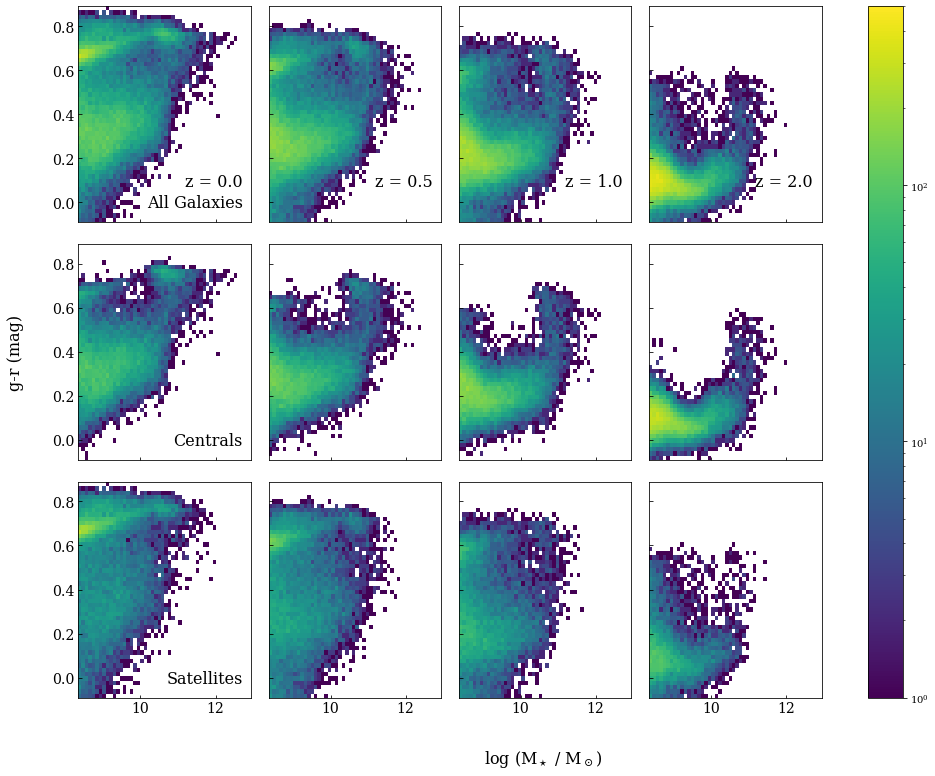

In [18]:
norm = mpl.colors.LogNorm(vmin = 1, vmax = 500)
cmap = copy.copy(mpl.cm.get_cmap('viridis'))
cmap.set_under('w')

fg.fig.colorbar(mpl.cm.ScalarMappable(norm = norm, cmap = cmap), ax = np.ravel(fg.axes))
fg.fig